### Import all the liabraries -

Pandas - Used to analyse data. It has function for analysing,cleaning,exploring and manipulating data.
Numpy - Mostly work on numerical values for making Arithmatic Operations.

Matplotlib - Comprehensive library for creating static,animated and intractive visualization.

Seaborn - Seaborn is a python data visualization library based on matplotlib. It provides a high-level interface for drawing intractive and informative statastical graphics.


Warnings - warnings are provided to warn the developer of situation that are not necessarily exceptions and ignore them.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


#### When you run df.info() on your DataFrame, it will display information like the number of non-null values, data types, and memory usage for each column. This can be helpful for understanding the structure and quality of your data.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

By using df.isnull().sum() function is check missing (null) values in a DataFrame and get the count of missing values for each column

In [6]:
df.drop("loan_id",axis=1,inplace=True)

By using Pandas DataFrame method drop column named "loan_id" from our DataFrame df. The axis=1 argument specifies that we are dropping a column, and inplace=True means that the change will be applied to the DataFrame df directly, without the need to reassign it.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


All the column names contain a space in front of the text, we need to trim them up to avoid future confusions.

In [8]:
df.columns = df.columns.str.replace(' ', '')

Let's take a look at the distribution of loan amounts.

In [9]:
df["loan_amount"].value_counts()

10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: loan_amount, Length: 378, dtype: int64

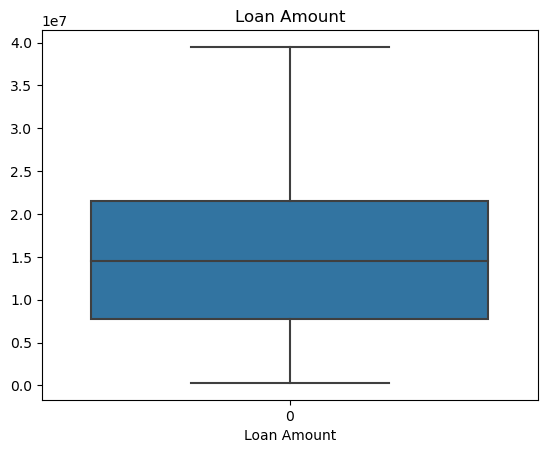

In [10]:
sns.boxplot(df['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

It will generate a boxplot of the "loan_amount" column, which is a great way to visualize the distribution and statistical characteristics of the loan amounts in dataset.

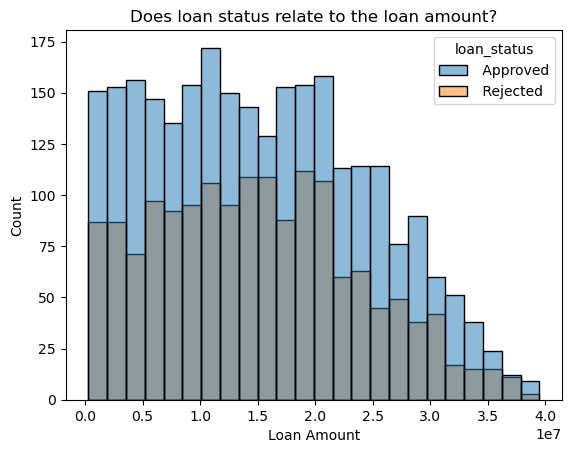

In [11]:
sns.histplot(df, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

It will create a histogram where the x-axis represents the loan amount, and different colors (or shades) will represent different loan statuses.

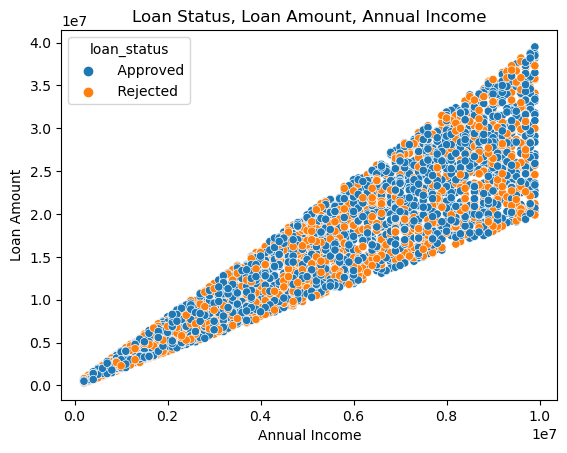

In [12]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

It will generate a scatterplot where the x-axis represents annual income, the y-axis represents loan amount, and different colors (distinguished by hue) represent different loan statuses. This visualization can help you understand the relationship between these variables.

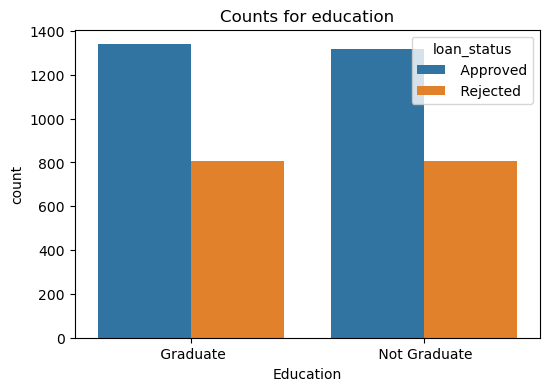

In [13]:
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

It will generate a countplot where the x-axis represents education levels, and different colors (distinguished by hue) represent different loan statuses.

The counts based on different education status are approximately the same.

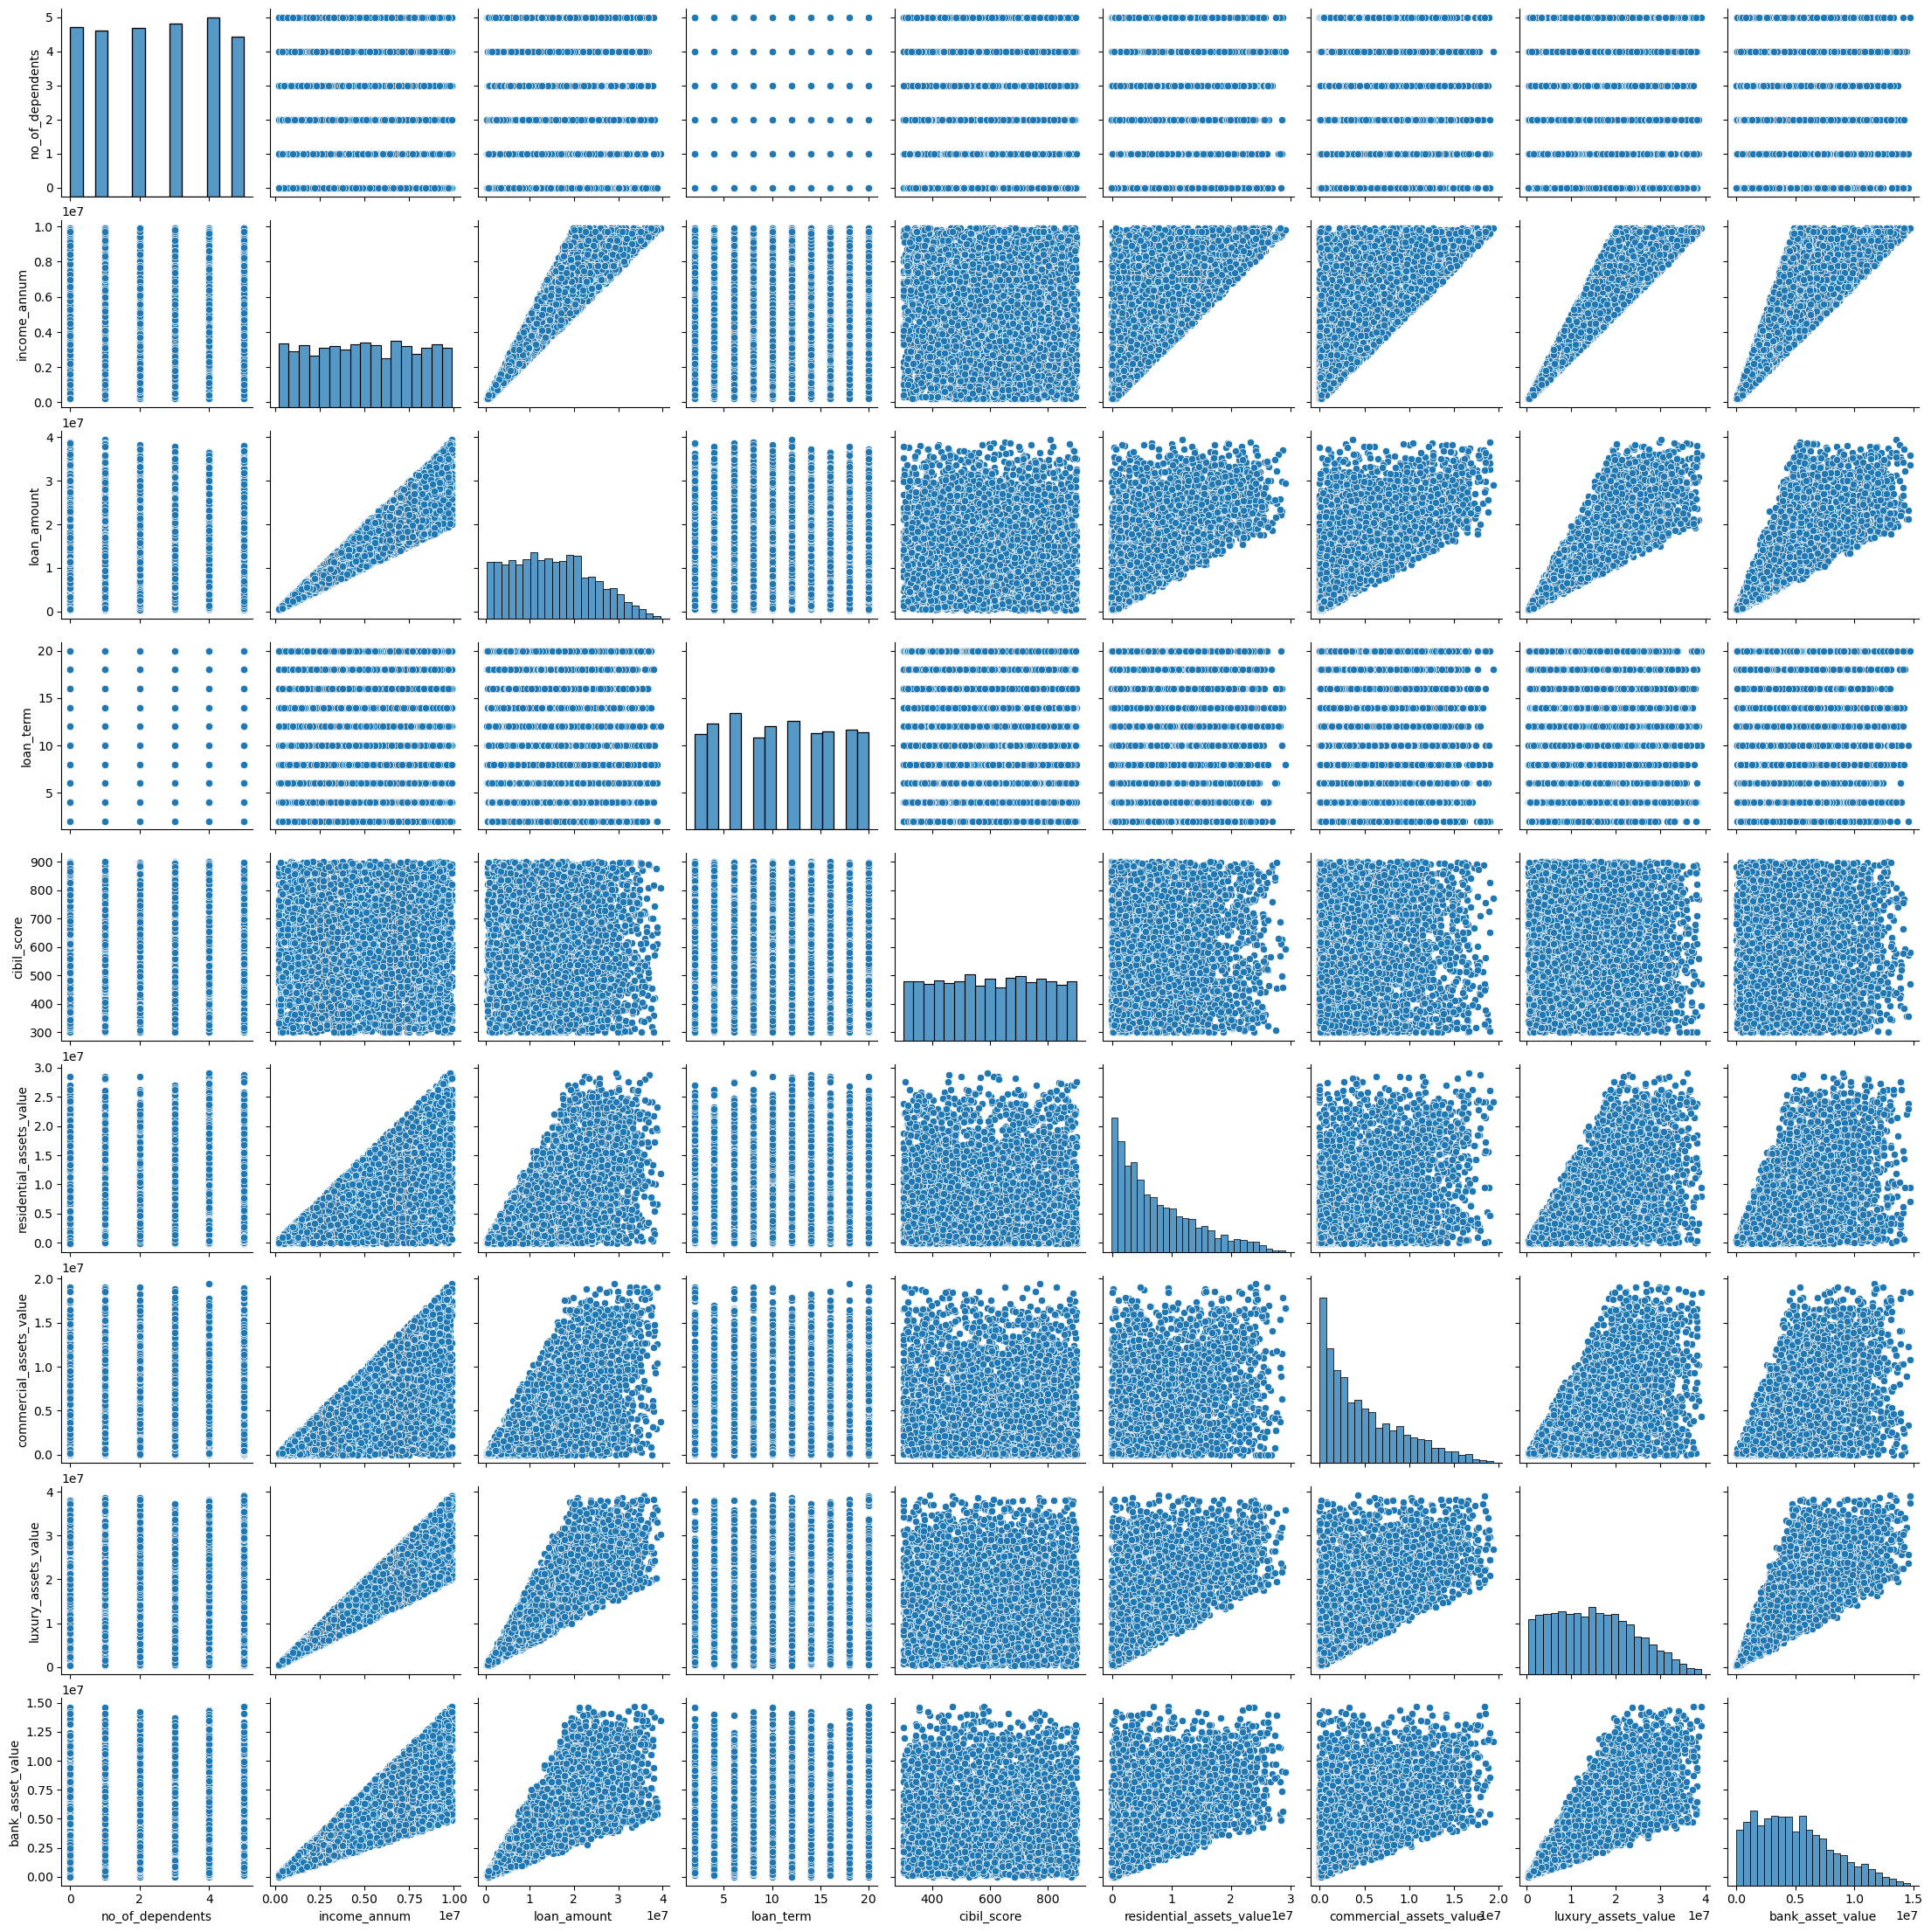

In [14]:
sns.pairplot(df)

It will generate a grid of scatterplots, where each plot shows the relationship between two numeric variables in your DataFrame. It's a useful way to visually explore correlations and patterns between different variables.

#### Divide the Data into Numeric and Categorical form

In [15]:
#Here we separating our DataFrame, df, into numerical and categorical features..

num_feature=df.select_dtypes(["int64","float64"])
cat_feature=df.select_dtypes(["object"]).columns

In [16]:
#num_feature: This DataFrame contains all the columns with data types 'int64' and 'float64', which typically represent numerical features. 

num_feature

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [17]:
#cat_feature: This variable contains the names of the columns in df with data type 'object', which usually indicates categorical features

cat_feature

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[cat_feature]=oe.fit_transform(df[cat_feature])

We using the OrdinalEncoder from scikit-learn to transform categorical features in a DataFrame. It assigns integers to categories based on the order in which they appear in the data.

In [19]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0.0,1.0,1000000,2300000,12,317,2800000,500000,3300000,800000,1.0
4265,0,1.0,1.0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0.0
4266,2,1.0,0.0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1.0
4267,1,1.0,0.0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0.0


#### Splitting Data into Features And Target

In [20]:
x=df.iloc[:,:-1]
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0.0,1.0,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1.0,1.0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1.0,0.0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1.0,0.0,4100000,12800000,8,780,8200000,700000,14100000,5800000


We are splitting overall data except target column that is "target" in x variable

In [21]:
y=df[["loan_status"]]
y

,loan_status
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4264,1.0
4265,0.0
4266,1.0
4267,0.0


In that separate "target" column as a target in y variable.

#### Apply Standard Scaler to Scale the data at one level

In [22]:
from sklearn.preprocessing import StandardScaler

Standardization is the process of rescaling the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

train_test_split function from scikit-learn to split your dataset into training and testing sets. This is a common in machine learning to evaluate the performance of a model.

In that testing data is 20% and random state is 1.

####
x represents your feature set.

y represents your target variable.

The train_test_split function randomly splits your data into training and testing sets. It takes several arguments:

x and y: The feature set and target variable to be split.

test_size: The proportion of the data to be used for testing (in this case, 20%).

random_state: A seed for the random number generator, which ensures reproducibility.

After running this code, you will have four new datasets:

xtrain: The training set of features.

xtest: The testing set of features.

ytrain: The corresponding training set of target values.

ytest: The corresponding testing set of target values.

These splits are commonly used in machine learning for training and evaluating models.






In [24]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

We make object of standard scaler. 
In that we have to pass xtrain and xtest for transform into standard scaler.

In [25]:
xtrain

array([[ 1.51250774,  1.00263891, -1.01504731, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-1.43500078,  1.00263891,  0.98517575, ...,  1.22311091,
         2.49843196,  0.88201987],
       [-0.84549907, -0.99736803, -1.01504731, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [ 0.92300603,  1.00263891,  0.98517575, ...,  1.29175048,
         1.47359943,  0.13963624],
       [-0.25599737,  1.00263891,  0.98517575, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [ 0.92300603, -0.99736803, -1.01504731, ..., -0.28695963,
         1.03750048, -0.10782497]])

This is our standardize xtrain data on which we performed Standard Scaling

In [26]:
xtest

array([[ 1.34468623, -0.98835816, -0.97684871, ...,  1.11057559,
         0.09116237,  0.66704919],
       [-0.45337542, -0.98835816, -0.97684871, ...,  0.99842012,
         0.32938266,  0.48602276],
       [ 0.14597846, -0.98835816, -0.97684871, ...,  2.50130348,
         1.54317176,  0.45585169],
       ...,
       [ 1.34468623,  1.01177897,  1.02369997, ...,  0.46007384,
        -0.36259057,  0.81790455],
       [ 0.74533235,  1.01177897, -0.97684871, ..., -0.84092967,
        -1.02053232, -1.11304405],
       [-1.05272931,  1.01177897, -0.97684871, ...,  0.12360742,
        -0.58946704, -0.99235977]])

This is our standardize xtest data on which we performed Standard Scaling

#### Train_Test_Split for separating data into training and testing phase

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

train_test_split function from scikit-learn to split your dataset into training and testing sets. This is a common in machine learning to evaluate the performance of a model.

In that testing data is 20% and random state is 1.

#### Build a Model by using LogisticRegression Algoritham

In [29]:
from sklearn.linear_model import LogisticRegression

Logistic regression is a commonly used algorithm for binary classification problems, where the target variable has two possible classes.

In [30]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)

Training the data on logistic reg and then making predictions on both the training and testing sets. This is a standard procedure in machine learning.

#### Classification Report of model trained on Logistic Regression

In [31]:
from sklearn.metrics import classification_report

In [32]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      2135
         1.0       0.80      0.38      0.51      1280

    accuracy                           0.73      3415
   macro avg       0.76      0.66      0.66      3415
weighted avg       0.75      0.73      0.70      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80       521
         1.0       0.78      0.41      0.53       333

    accuracy                           0.72       854
   macro avg       0.74      0.67      0.67       854
weighted avg       0.74      0.72      0.70       854



Classification_report function from scikit-learn to print the classification report for both the training and testing sets. The classification report provides a summary of various classification metrics, such as precision, recall, and F1-score, which can help us understand the performance of your model.

According to classification Report accuracy of training data is 73% and testing data is 72%.

#### By using Hyperparameter or Hypertunners

In [33]:
lr=LogisticRegression(solver="liblinear")
lr.fit(xtrain,ytrain)
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)

In [34]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      2135
         1.0       0.40      0.00      0.01      1280

    accuracy                           0.62      3415
   macro avg       0.51      0.50      0.39      3415
weighted avg       0.54      0.62      0.48      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.76       521
         1.0       0.33      0.01      0.01       333

    accuracy                           0.61       854
   macro avg       0.47      0.50      0.38       854
weighted avg       0.50      0.61      0.47       854



In [35]:
lr=LogisticRegression(solver="sag")
lr.fit(xtrain,ytrain)
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)

In [36]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      2135
         1.0       0.36      0.00      0.01      1280

    accuracy                           0.62      3415
   macro avg       0.49      0.50      0.39      3415
weighted avg       0.53      0.62      0.48      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.76       521
         1.0       0.33      0.01      0.01       333

    accuracy                           0.61       854
   macro avg       0.47      0.50      0.38       854
weighted avg       0.50      0.61      0.47       854



In [37]:
lr=LogisticRegression(solver="saga")
lr.fit(xtrain,ytrain)
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)

In [38]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      2135
         1.0       0.36      0.00      0.01      1280

    accuracy                           0.62      3415
   macro avg       0.49      0.50      0.39      3415
weighted avg       0.53      0.62      0.48      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.76       521
         1.0       0.33      0.01      0.01       333

    accuracy                           0.61       854
   macro avg       0.47      0.50      0.38       854
weighted avg       0.50      0.61      0.47       854



The solver parameter in scikit-learn's LogisticRegression specifies the algorithm to use in the optimization problem, and liblinear,sag and saga is one of the options.

#### Build a model by using KNN Algoritham

In [39]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier from scikit-learn, which is a classifier based on k-nearest neighbors. K-nearest neighbors is a type of instance-based learning or lazy learning

In [40]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred_train=knn.predict(xtrain)
ypred_test=knn.predict(xtest)

KNeighborsClassifier with n_neighbors=5, fitted it on your training data, and then made predictions on both the training and testing sets. This is a common procedure when working with the k-nearest neighbors algorithm.

#### Evaluate the model by using Classification_report

In [41]:
from sklearn.metrics import classification_report

In [42]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79      2135
         1.0       0.68      0.50      0.58      1280

    accuracy                           0.72      3415
   macro avg       0.71      0.68      0.69      3415
weighted avg       0.72      0.72      0.71      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.62      0.74      0.67       521
         1.0       0.41      0.28      0.33       333

    accuracy                           0.56       854
   macro avg       0.51      0.51      0.50       854
weighted avg       0.53      0.56      0.54       854



According to classification Report accuracy of training data is 72% and testing data is 56%.

#### Build a model on SVM Algoritham

In [43]:
from sklearn.svm import SVC

SVC (Support Vector Classification) class from scikit-learn. The SVC is a powerful algorithm commonly used for classification tasks and it's based on the concept of support vectors within a high-dimensional space.

In [44]:
svm=SVC()

In [45]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model 

Defined a function mymodel that takes a model as an argument, fits the model on the training data, makes predictions on the testing data, and prints the classification report.

In [46]:
from sklearn.pipeline import Pipeline

We using pipeline beacause data should be process smoothly.

In [47]:
pipe=Pipeline(steps=[('scaler',StandardScaler()),('svm',SVC())])

In pipe we write steps so that steps will be executed one by one

In [48]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

Fitting the entire pipeline (pipe) on the training data (xtrain, ytrain) and then making predictions on the testing data (xtest).

In [49]:
mymodel(svm)

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       521
         1.0       0.00      0.00      0.00       333

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



SVC()

In [50]:
from sklearn.tree import DecisionTreeClassifier

We are importing the DecisionTreeClassifier from scikit-learn.

In [51]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ytrain_pred=dt.predict(xtrain)
ytest_pred=dt.predict(xtest)

We are created a DecisionTreeClassifier, fitted it on your training data, and then made predictions on both the training and testing sets. 

#### Evaluate the model by using Classification_report

In [52]:
from sklearn.metrics import classification_report,accuracy_score

In [53]:
print("Train Data")
print(classification_report(ytrain,ytrain_pred))
print("Test Data")
print(classification_report(ytest,ytest_pred))

Train Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2135
         1.0       1.00      1.00      1.00      1280

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       521
         1.0       0.97      0.98      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



According to classification Report accuracy of training data is 100% its high bias and testing data is 98% its variance is high. 

#### Performing Hypertunning on model

#### Hyper parameters with impurity checking gini

In [54]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max Depth:{i} accuracy): {ac}")

Max Depth:1 accuracy): 0.9484777517564403
Max Depth:2 accuracy): 0.9601873536299765
Max Depth:3 accuracy): 0.9637002341920374
Max Depth:4 accuracy): 0.9695550351288056
Max Depth:5 accuracy): 0.9660421545667447
Max Depth:6 accuracy): 0.9672131147540983
Max Depth:7 accuracy): 0.9695550351288056
Max Depth:8 accuracy): 0.9695550351288056
Max Depth:9 accuracy): 0.9730679156908665
Max Depth:10 accuracy): 0.9730679156908665
Max Depth:11 accuracy): 0.9800936768149883
Max Depth:12 accuracy): 0.9824355971896955
Max Depth:13 accuracy): 0.9824355971896955
Max Depth:14 accuracy): 0.9824355971896955
Max Depth:15 accuracy): 0.9824355971896955
Max Depth:16 accuracy): 0.9836065573770492
Max Depth:17 accuracy): 0.9812646370023419
Max Depth:18 accuracy): 0.9836065573770492
Max Depth:19 accuracy): 0.9824355971896955
Max Depth:20 accuracy): 0.9812646370023419
Max Depth:21 accuracy): 0.9824355971896955
Max Depth:22 accuracy): 0.9824355971896955
Max Depth:23 accuracy): 0.9836065573770492
Max Depth:24 accurac

Using a loop to train Decision Tree models with max_depth and evaluate their accuracy on the testing set. This can be useful for finding the optimal value for the max_depth hyperparameter, which controls the maximum depth of the decision tree.

In [55]:
dt1=DecisionTreeClassifier(max_depth=5)
mymodel(dt1)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       521
         1.0       0.92      0.99      0.96       333

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.97      0.97       854



DecisionTreeClassifier(max_depth=5)

We are created a DecisionTreeClassifier with a specified maximum depth of 5 and then used your mymodel function to fit the model on the training data and evaluate its performance on the testing data. 

#### Lets checking overfitting scenario

In [56]:
dt1.score(xtrain,ytrain)

0.9742313323572475

To check for overfitting, we can compare the accuracy of our model on the training set (xtrain, ytrain) with its accuracy on the testing set (xtest, ytest).

Here the accuracy of the trainning data is high as compaired to testing data, this model is overfitting.

#### Hyper parameters with impurity checking min_sample_split

In [57]:
for i in range(5,50):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min sample split:{i} accuracy): {ac}")

min sample split:5 accuracy): 0.9812646370023419
min sample split:6 accuracy): 0.9836065573770492
min sample split:7 accuracy): 0.9847775175644028
min sample split:8 accuracy): 0.9847775175644028
min sample split:9 accuracy): 0.9847775175644028
min sample split:10 accuracy): 0.9859484777517564
min sample split:11 accuracy): 0.9859484777517564
min sample split:12 accuracy): 0.9859484777517564
min sample split:13 accuracy): 0.9859484777517564
min sample split:14 accuracy): 0.9859484777517564
min sample split:15 accuracy): 0.9859484777517564
min sample split:16 accuracy): 0.9859484777517564
min sample split:17 accuracy): 0.9859484777517564
min sample split:18 accuracy): 0.9859484777517564
min sample split:19 accuracy): 0.9859484777517564
min sample split:20 accuracy): 0.9859484777517564
min sample split:21 accuracy): 0.9859484777517564
min sample split:22 accuracy): 0.9859484777517564
min sample split:23 accuracy): 0.9859484777517564
min sample split:24 accuracy): 0.9859484777517564
min s

Our code is iterating over different values for the min_samples_split parameter of the DecisionTreeClassifier and printing the accuracy on the testing set for each configuration.

In [58]:
dt2=DecisionTreeClassifier(min_samples_split=9)
mymodel(dt2)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       521
         1.0       0.98      0.98      0.98       333

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



DecisionTreeClassifier(min_samples_split=9)

 We are created a DecisionTreeClassifier with a specified value for the min_samples_split parameter in this case, min_samples_split=9, and then we are used our mymodel function to fit the model on the training data and evaluate its performance on the testing data.

#### Lets checking overfitting scenario

In [59]:
dt2.score(xtrain,ytrain)

0.9944363103953148

To check for overfitting, we can compare the accuracy of our model on the training set (xtrain, ytrain) with its accuracy on the testing set (xtest, ytest).

Here the accuracy of the trainning data is high as compaired to testing data, this model is overfitting.

#### Hyper parameters with impurity checking min_sample_leaf

In [60]:
for i in range(1,51):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min sample leaf:{i} accuracy): {ac}")

min sample leaf:1 accuracy): 0.9824355971896955
min sample leaf:2 accuracy): 0.9800936768149883
min sample leaf:3 accuracy): 0.9836065573770492
min sample leaf:4 accuracy): 0.9871194379391101
min sample leaf:5 accuracy): 0.9882903981264637
min sample leaf:6 accuracy): 0.9859484777517564
min sample leaf:7 accuracy): 0.9847775175644028
min sample leaf:8 accuracy): 0.9847775175644028
min sample leaf:9 accuracy): 0.9812646370023419
min sample leaf:10 accuracy): 0.9824355971896955
min sample leaf:11 accuracy): 0.9824355971896955
min sample leaf:12 accuracy): 0.977751756440281
min sample leaf:13 accuracy): 0.977751756440281
min sample leaf:14 accuracy): 0.977751756440281
min sample leaf:15 accuracy): 0.9800936768149883
min sample leaf:16 accuracy): 0.9789227166276346
min sample leaf:17 accuracy): 0.9800936768149883
min sample leaf:18 accuracy): 0.9812646370023419
min sample leaf:19 accuracy): 0.9800936768149883
min sample leaf:20 accuracy): 0.977751756440281
min sample leaf:21 accuracy): 0.9

Our code iterates over different values for the min_samples_leaf parameter of the DecisionTreeClassifier and prints the accuracy on the testing set for each configuration.

#### Building model with final value of max depth as 2

In [61]:
dt3=DecisionTreeClassifier(min_samples_split=2)
mymodel(dt3)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       521
         1.0       0.97      0.98      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



DecisionTreeClassifier()

#### Lets checking overfitting scenario

In [62]:
dt3.score(xtrain,ytrain)

1.0

To check for overfitting, we can compare the accuracy of our model on the training set (xtrain, ytrain) with its accuracy on the testing set (xtest, ytest).

Here the accuracy of the trainning data is high as compaired to testing data, this model is overfitting.

## Voting

In [63]:
from sklearn.ensemble import VotingClassifier

The VotingClassifier in scikit-learn is a meta-estimator that combines the predictions of multiple machine learning models. It allows to combine different classifiers and use a majority vote or weighted voting to make predictions.

In [64]:
model=[]
accuracy=[]
model.append(("Logistic Regression",LogisticRegression()))
model.append(("Decision Tree",DecisionTreeClassifier()))

We are creating a list named model and appending tuples to it, where each tuple contains a model's name and an instance of that model. 

In [65]:
model

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier())]

In [66]:
vc=VotingClassifier(estimators=model)
vc.fit(xtrain,ytrain)
ypred_train=vc.predict(xtrain)
ypred_test=vc.predict(xtest)

We are created a VotingClassifier using the list of models we defined earlier and trained it on our training data (xtrain, ytrain). We are also made predictions on both the training set (ypred_train) and the test set (ypred_test).

#### Classification Report

In [67]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      2135
         1.0       1.00      0.38      0.55      1280

    accuracy                           0.77      3415
   macro avg       0.86      0.69      0.69      3415
weighted avg       0.83      0.77      0.73      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       521
         1.0       0.99      0.41      0.57       333

    accuracy                           0.77       854
   macro avg       0.85      0.70      0.71       854
weighted avg       0.83      0.77      0.74       854



The classification_report provides metrics like precision, recall, f1-score, and support for each class. It's a useful way to evaluate the performance of your classifier on different classes.

According to classification Report accuracy of training data is 77% and testing data is 77%.

## Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier

We are importing the BaggingClassifier from scikit-learn, which is a popular ensemble learning method. This helps to improve the overall accuracy of the model.

In [69]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred_train=bg.predict(xtrain)
ypred_test=bg.predict(xtest)

Here data is properly loaded, and split it into training (xtrain, ytrain) and testing (xtest, ytest) sets.

#### Classification Report

In [70]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.65      0.99      0.79      2135
         1.0       0.90      0.12      0.21      1280

    accuracy                           0.66      3415
   macro avg       0.78      0.55      0.50      3415
weighted avg       0.75      0.66      0.57      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.64      0.98      0.78       521
         1.0       0.84      0.15      0.26       333

    accuracy                           0.66       854
   macro avg       0.74      0.57      0.52       854
weighted avg       0.72      0.66      0.58       854



The classification_report provides metrics like precision, recall, f1-score, and support for each class. It's a useful way to evaluate the performance of your classifier on different classes.

According to classification Report accuracy of training data is 62% and testing data is 61% through logistic regression.

In [71]:
bg=BaggingClassifier(KNeighborsClassifier())
bg.fit(xtrain,ytrain)
ypred_train=bg.predict(xtrain)
ypred_test=bg.predict(xtest)

#### Classification Report

In [72]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81      2135
         1.0       0.71      0.51      0.59      1280

    accuracy                           0.74      3415
   macro avg       0.73      0.69      0.70      3415
weighted avg       0.73      0.74      0.73      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69       521
         1.0       0.44      0.29      0.35       333

    accuracy                           0.58       854
   macro avg       0.53      0.53      0.52       854
weighted avg       0.55      0.58      0.55       854



## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred_train=rf.predict(xtrain)
ypred_test=rf.predict(xtest)

We are using the RandomForestClassifier from scikit-learn, which is a popular ensemble method based on constructing a multitude of decision trees and merging them together to get a more accurate and stable prediction.

#### Classification Report

In [74]:
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2135
         1.0       1.00      1.00      1.00      1280

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

Test Data
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       521
         1.0       0.98      0.97      0.97       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



The classification_report provides metrics like precision, recall, f1-score, and support for each class. It's a useful way to evaluate the performance of your classifier on different classes.

According to classification Report accuracy of training data is 100% and testing data is 98% .